In [50]:
# import libraries
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.stats import mad_std
from astropy.stats import SigmaClip
from photutils import make_source_mask
from astropy.stats import biweight_location
from astropy.visualization import SqrtStretch
from astropy.stats import sigma_clipped_stats
from photutils import Background2D, MedianBackground
from photutils.datasets import make_100gaussians_image
from astropy.visualization.mpl_normalize import ImageNormalize

In [27]:
# The following code shows how we can open a FITS file and print out its header information:

hudlist = fits.open('./dataset2/g_prime/CCDC-LIGHT-20210110233126.fits')

In [28]:
hudlist.info()

Filename: ./dataset2/g_prime/CCDC-LIGHT-20210110233126.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   (3352, 2532)   int16 (rescales to uint16)   


In [29]:
data = hudlist[0].data

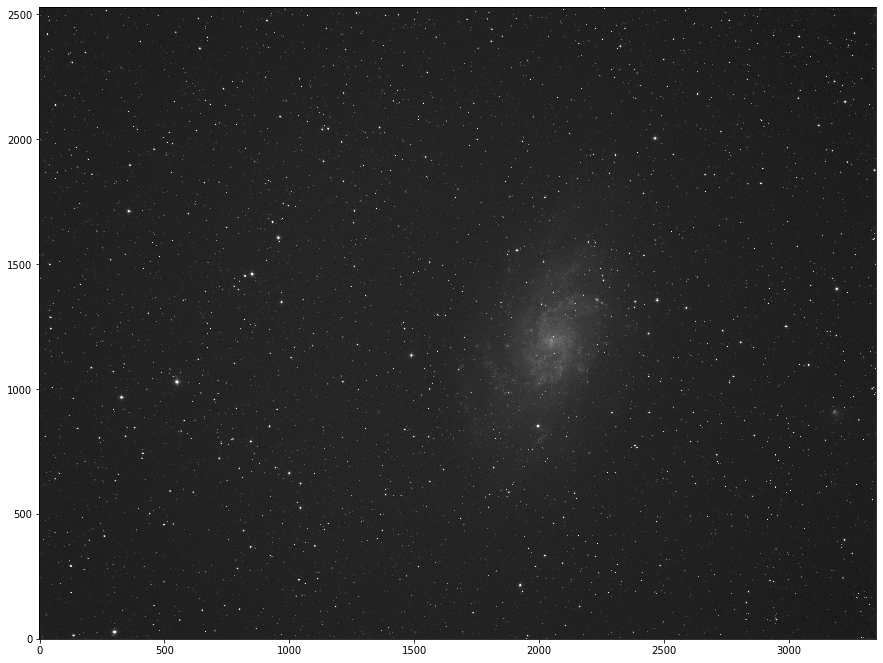

In [40]:
norm = ImageNormalize(stretch=SqrtStretch())
plt.figure(figsize=(15,15))
plt.imshow(data, norm=norm, origin='lower', cmap='Greys_r', interpolation='nearest')

In [42]:
print(np.median(data))  

print(biweight_location(data))  

3238.0
3230.7116377266057


In [43]:
print(mad_std(data))  

188.29048175021146


In [44]:
mean, median, std = sigma_clipped_stats(data, sigma=3.0)
print((mean, median, std)) 

(3231.3439752585227, 3225.0, 171.14558903321915)


In [46]:
mask = make_source_mask(data, nsigma=2, npixels=5, dilate_size=11)
mean, median, std = sigma_clipped_stats(data, sigma=3.0, mask=mask)
print((mean, median, std))  

(3203.2479819847244, 3203.0, 152.28384013305418)


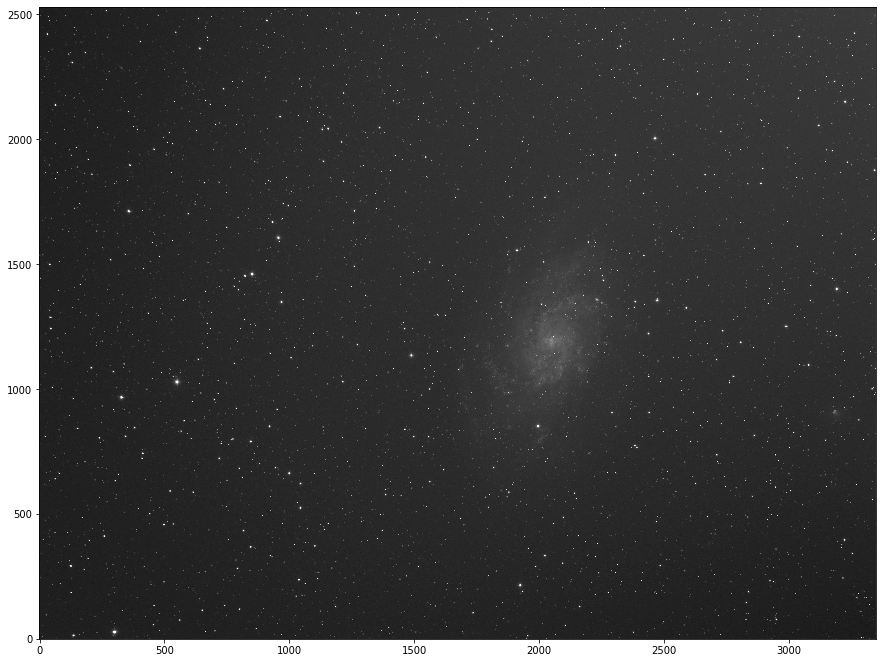

In [48]:
ny, nx = data.shape
y, x = np.mgrid[:ny, :nx]
gradient =  x * y / 5000.
data2 = data + gradient
plt.figure(figsize=(15,15))
plt.imshow(data2, norm=norm, origin='lower', cmap='Greys_r', interpolation='nearest')

In [49]:
sigma_clip = SigmaClip(sigma=3.)
bkg_estimator = MedianBackground()
bkg = Background2D(data2, (50, 50), filter_size=(3, 3), sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)

In [51]:
print(bkg.background_median)  

print(bkg.background_rms_median)  

3635.4832
87.21913083895679


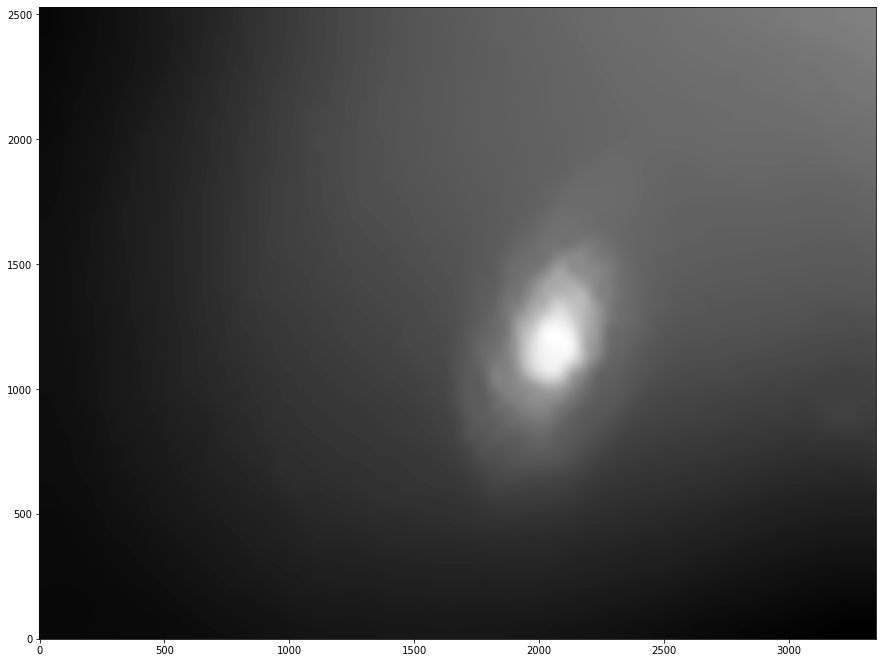

In [52]:
plt.figure(figsize=(15,15))
plt.imshow(bkg.background, origin='lower', cmap='Greys_r', interpolation='nearest')

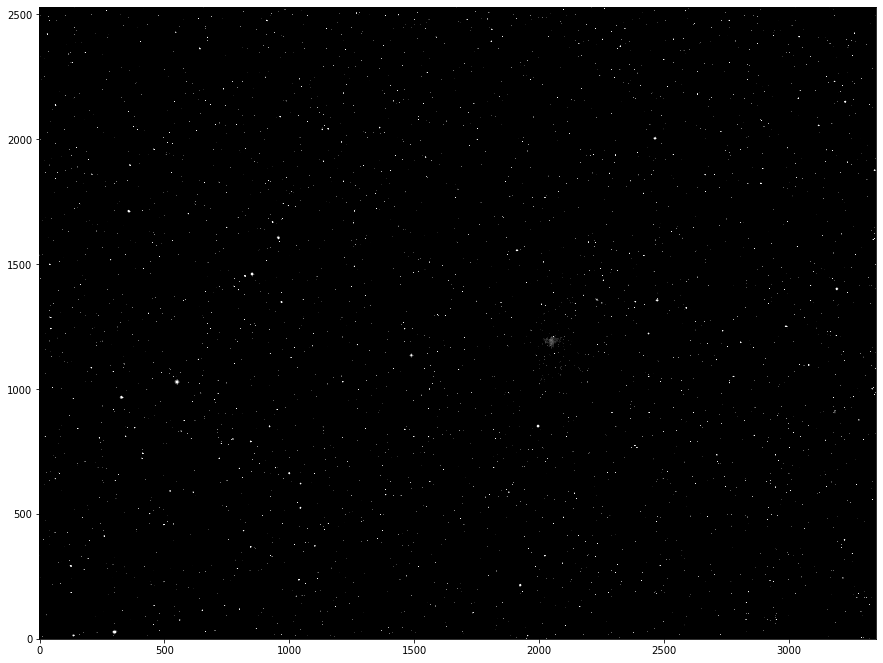

In [53]:
plt.figure(figsize=(15,15))
plt.imshow(data2 - bkg.background, norm=norm, origin='lower',cmap='Greys_r', interpolation='nearest')